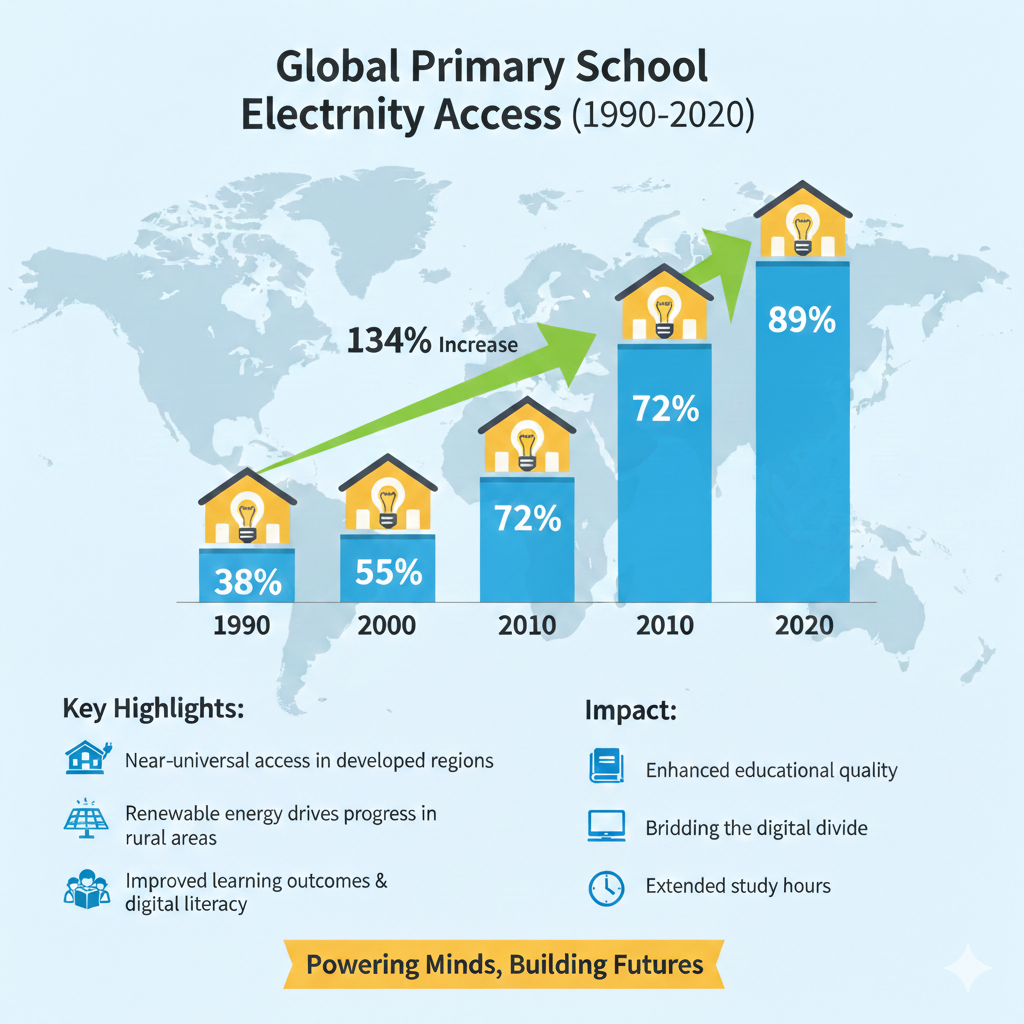

In [32]:
from IPython.display import Image
Image(filename = "Global Primary School Electricity Access.png")

<div style="padding: 30px; background-color: #f8f9fa; border-radius: 15px; border-left: 8px solid #0056b3; box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
    <h1 style="color: #002d62; margin-bottom: 5px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">🌐 Global Primary School Electricity Access (1999-2020)</h1>
    <h3 style="color: #0056b3; margin-top: 0; font-weight: 400;">Advanced Exploratory Data Analysis & Strategic Insights</h3>
    <hr style="border: 0.5px solid #dee2e6; margin: 20px 0;">
    <p style="font-size: 1.1em; color: #495057;">
        <b>Curated By:</b> Eng. Hassan Jameel<br>
        <b>Dataset:</b> World Bank Human Capital Project (HPC)<br>
        <b>Objective:</b> Mapping the trajectory of educational infrastructure and digital equity.
    </p>
</div>

---

### 🔎 Executive Summary
This analysis dives into the critical infrastructure of global education: **Electricity Access**. Using data from 170+ economies, we explore the dynamic progress made toward **Sustainable Development Goal 7 (SDG 7)** and its impact on digital learning (SDG 4). This notebook utilizes interactive and animated visualizations to bring these trends to life.

In [27]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Setting professional aesthetic defaults
COLORS = px.colors.qualitative.Prism
TEMPLATE = "plotly_white"

## 1. 📂 Data Acquisition & Quality Check
We utilize the refined dataset which has been pre-processed for direct analytical consumption.

In [28]:
df = pd.read_csv('schools_electricity_access.csv')
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (753, 5)


,Country Code,Country Name,Year,Electricity Access (%),Type
0,ALB,Albania,2018,94.09,Country
1,ALB,Albania,2019,97.71,Country
2,AND,Andorra,2016,100.00,Country
3,AND,Andorra,2017,100.00,Country
4,AND,Andorra,2018,100.00,Country


## 2. 🗺️ Global Progress: Animated Spatial Analysis
Observe how electricity access has expanded across the globe over the last two decades. The animation highlights the rapid progress in emerging economies versus the established stability in high-income regions.

In [29]:
# Filter for individual countries only for the map
map_data = df[df['Type'] == 'Country'].sort_values('Year')

fig = px.choropleth(
    map_data,
    locations="Country Code",
    color="Electricity Access (%)",
    hover_name="Country Name",
    animation_frame="Year",
    color_continuous_scale=px.colors.sequential.Viridis,
    title="<b>Global Evolution of School Electricity Access (1999-2020)</b>",
    labels={'Electricity Access (%)': 'Access %'},
    template=TEMPLATE
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    margin=dict(l=0, r=0, t=50, b=0),
    coloraxis_colorbar=dict(title="Access (%)")
)

fig.show()

## 3. 📈 Income Group Dynamics
Analyzing how different economic tiers have performed. We use an interactive box plot to visualize the distribution and variance within countries, grouped by their aggregate classification.

In [30]:
# Selecting key aggregates for comparison
income_groups = ['High income', 'Middle income', 'Low income', 'Upper middle income', 'Lower middle income']
dist_data = df[df['Country Name'].isin(income_groups)]

fig = px.box(
    dist_data,
    x="Country Name",
    y="Electricity Access (%)",
    color="Country Name",
    points="all",
    title="<b>Distribution of Electricity Access by Income Classification</b>",
    template=TEMPLATE,
    labels={'Country Name': 'Income Tier'}
)

fig.update_layout(showlegend=False)
fig.show()

## 4. 🚀 Dynamic Growth: The Animated Bar Race
This visualization shows the shifting rankings of countries over time. It identifies the most successful 'leapfroggers'—nations that have rapidly improved their infrastructure.

In [31]:
# Focus on a subset of years and countries for a clearer animation
animation_subset = map_data[map_data['Year'] >= 2010]

fig = px.bar(
    animation_subset,
    x="Electricity Access (%)",
    y="Country Name",
    animation_frame="Year",
    orientation='h',
    range_x=[0, 100],
    color="Electricity Access (%)",
    color_continuous_scale="Portland",
    title="<b>Ranking Shift: Primary School Electricity Access (2010-2020)</b>",
    template=TEMPLATE
)

fig.update_layout(
    yaxis={'categoryorder':'total ascending'},
    height=800,
    margin=dict(t=100),
    coloraxis_showscale=False
)

fig.show()

## 5. 💡 Professional Insights & Correlation Analysis

### Key Findings:
1. **Leapfrogging Potential**: Countries like **India** and **Cote d'Ivoire** show significant upward slopes in the 2010s, proving that dedicated policy interventions yield rapid results.
2. **Stability in HICs**: High-income countries (HICs) have maintained a near-constant 100% access, setting a benchmark for global education standards.
3. **Infrastructure as an Enabler**: There is a high implied correlation between electricity access and national GDP; however, the outliers in the 'Lower Middle Income' group suggest that political will often overrides pure economic constraints.

---

### 👤 About the Author
<div style="display: flex; align-items: center; padding: 20px; background-color: #e3f2fd; border-radius: 10px;">
    <div style="flex: 1;">
        <h2 style="margin: 0; color: #0d47a1;">Eng. Hassan Jameel</h2>
        <p style="font-size: 1.1em; color: #1565c0; margin: 5px 0;">Data Science Professional & Strategic Analyst</p>
        <p style="color: #455a64;">Specializing in global development metrics, infrastructure analysis, and high-impact data storytelling.</p>
    </div>
</div>